In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1 - mesh.tmask[0]
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

In [18]:
imin, imax = 300, 600
jmin, jmax = 150, 350

In [19]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, previous, vvmin=0, iz=0, factor=0.5):
    green = np.array(ng.variables[variable][0])
    hind = np.array(hd.variables[variable][0])

    colors = axs[0, 0].pcolormesh(np.ma.masked_array(green[iz, imin:imax, jmin:jmax], mask=tmask[iz, imin:imax, jmin:jmax]), cmap=cmap, vmin=vvmin)
    fig.colorbar(colors, ax=axs[0, 0])

    colors = axs[0, 1].pcolormesh(np.ma.masked_array(hind[iz, imin:imax, jmin:jmax], mask=tmask[iz, imin:imax, jmin:jmax]), cmap=cmap, vmin=vvmin)
    fig.colorbar(colors, ax=axs[0, 1])

    vmax = factor*np.nanmax(np.absolute(hind - green))
    cmapdiff = cm.balance
    cmapdiff.set_bad('k')
    colors = axs[0, 2].pcolormesh(np.ma.masked_array(hind[iz, imin:imax, jmin:jmax] - green[iz, imin:imax, jmin:jmax],
                                                     mask=tmask[iz, imin:imax, jmin:jmax]), cmap=cmapdiff, vmax=vmax, vmin=-vmax)
    fig.colorbar(colors, ax=axs[0, 2])

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
  
    for i in range(1, 3):
        cbar = vis.contour_thalweg(axs[i, 0], green, bathy, mesh, name, cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 1], hind, bathy, mesh, name, cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 2], hind-green, bathy, mesh, np.arange(-0.9*vmax, vmax, 0.1*vmax), cmap='bwr')
    for ax in [axs[2, 0], axs[2, 1], axs[2, 2]]:
        ax.set_ylim((20, 0))
        ax.set_xlim((300, 500))
        
    axs[0,0].set_title(previous)
    axs[0,1].set_title('Hindcast v3')
    axs[0,2].set_title('New - old')

# Physics (versus ng and v2)

In [13]:
ng = xr.open_dataset('/results/SalishSea/nowcast-green/31may15/SalishSea_1d_20150531_20150531_grid_T.nc')
hd = xr.open_dataset('/results/SalishSea/hindcast/31may15/SalishSea_1d_20150531_20150531_grid_T.nc')

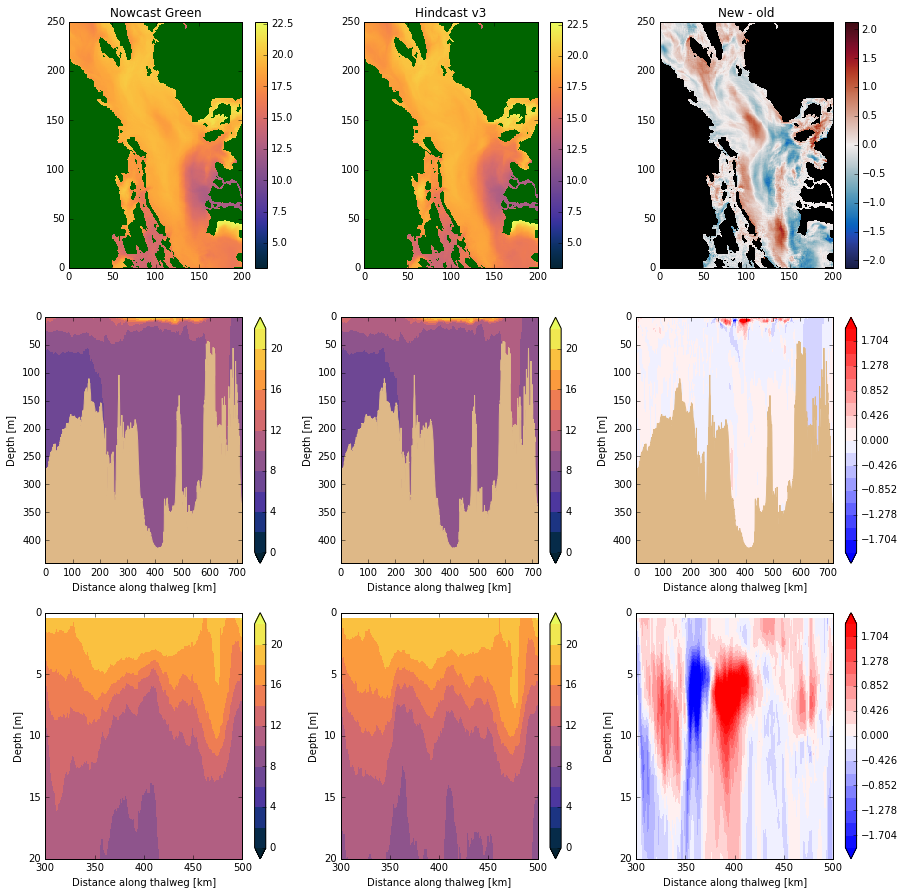

In [12]:
variable, name, cmapt = 'votemper', 10, cm.thermal
cmapt.set_bad('darkgreen')
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmapt, 'Nowcast Green', vvmin=3)

In [15]:
h2 = xr.open_dataset('/mnt/archive5/hindcast_201806_v2/31may15/SalishSea_1d_20150531_20150531_grid_T.nc')

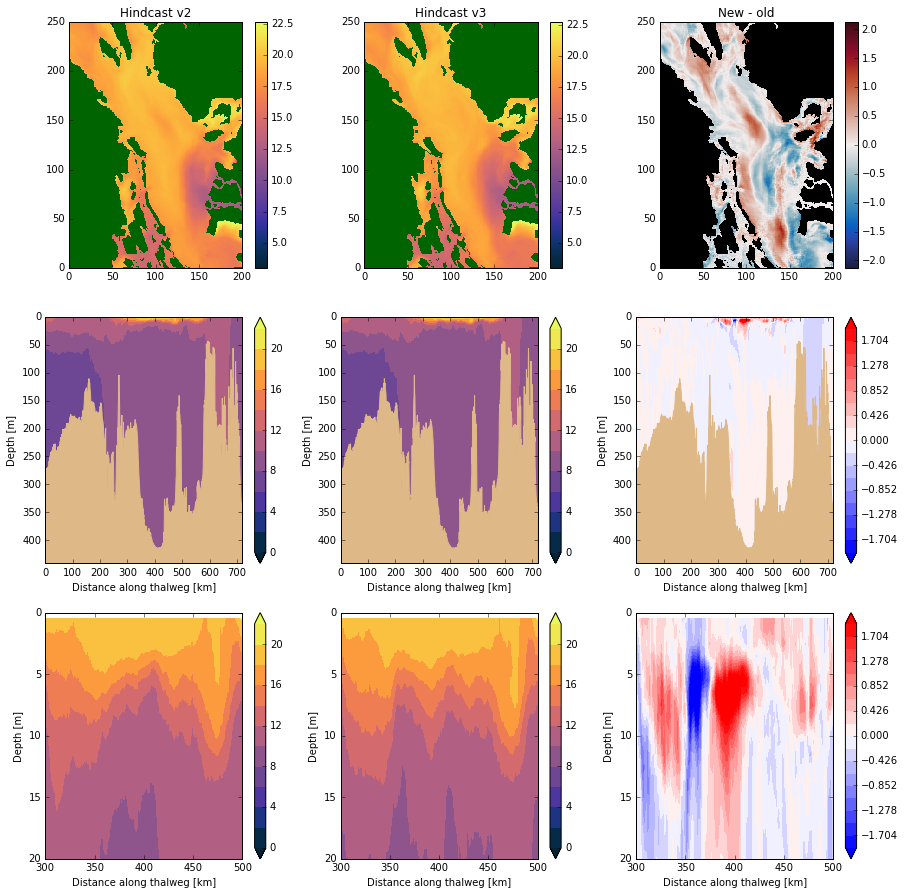

In [16]:
variable, name, cmapt = 'votemper', 10, cm.thermal
cmapt.set_bad('darkgreen')
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmapt, 'Hindcast v2', vvmin=3)

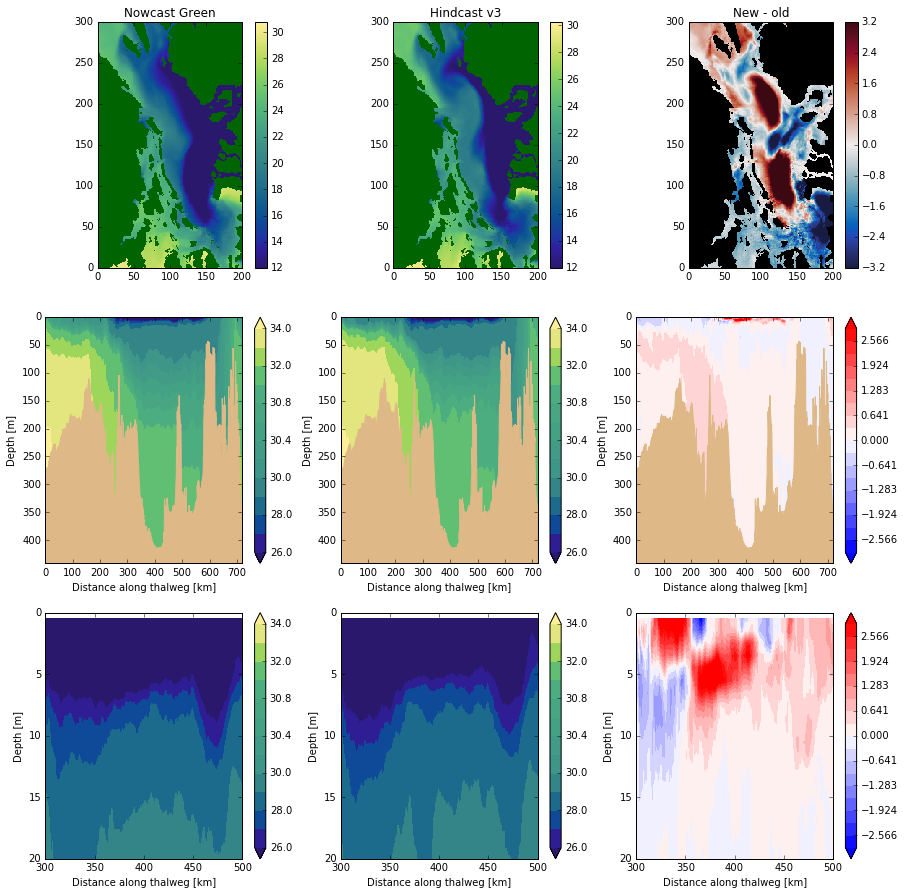

In [23]:
variable, name, cmaps = 'vosaline', 'salinity', cm.haline
cmaps.set_bad('darkgreen')
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmaps, 'Nowcast Green', vvmin=12, iz=0, factor=0.1)

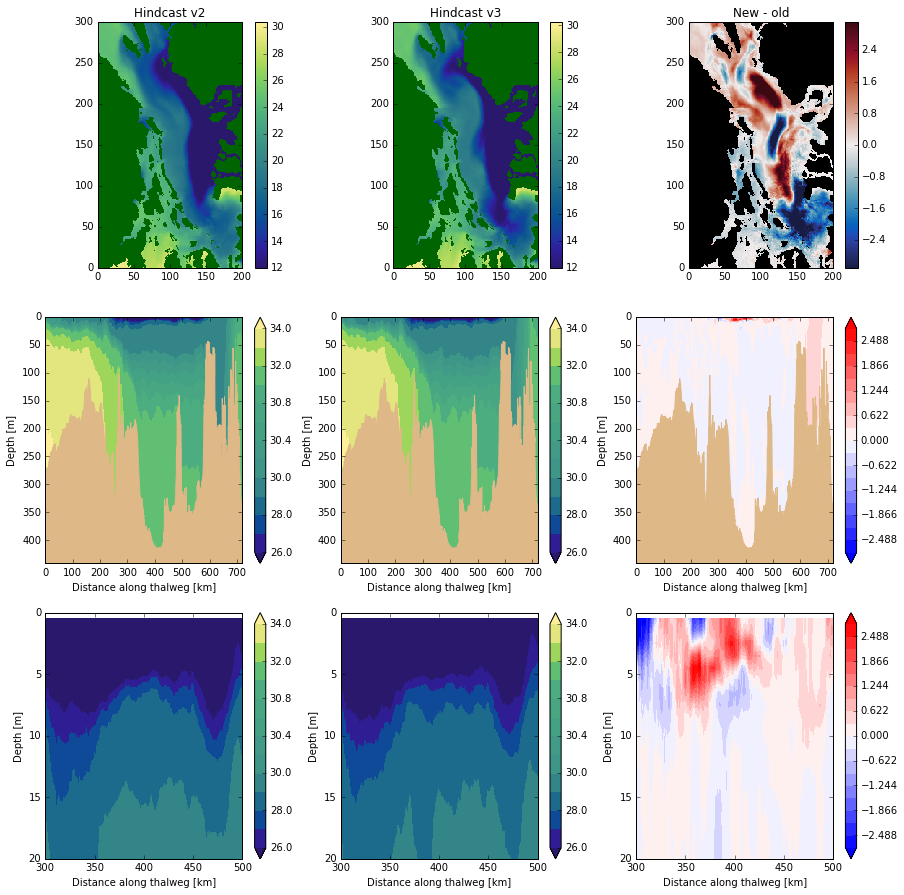

In [22]:
variable, name, cmaps = 'vosaline', 'salinity', cm.haline
cmaps.set_bad('darkgreen')
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmaps, 'Hindcast v2', vvmin=12, iz=0, factor=0.4)

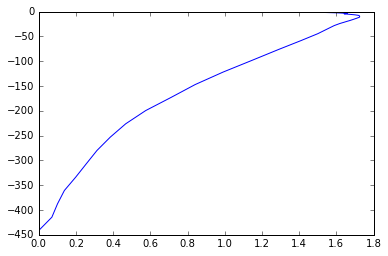

In [24]:
profile_ng = ng.vosaline[0].mean(axis=2).mean(axis=1)
profile_hd = hd.vosaline[0].mean(axis=2).mean(axis=1)
plt.plot(profile_hd - profile_ng, -mesh.variables['gdept_1d'][0])

In [25]:
ng = xr.open_dataset('/results/SalishSea/nowcast-green/31may15/SalishSea_1d_20150531_20150531_ptrc_T.nc')
hd = xr.open_dataset('/results/SalishSea/hindcast/31may15/SalishSea_1d_20150531_20150531_ptrc_T.nc')
h2 = xr.open_dataset('/mnt/archive5/hindcast_201806_v2/31may15/SalishSea_1d_20150531_20150531_ptrc_T.nc')

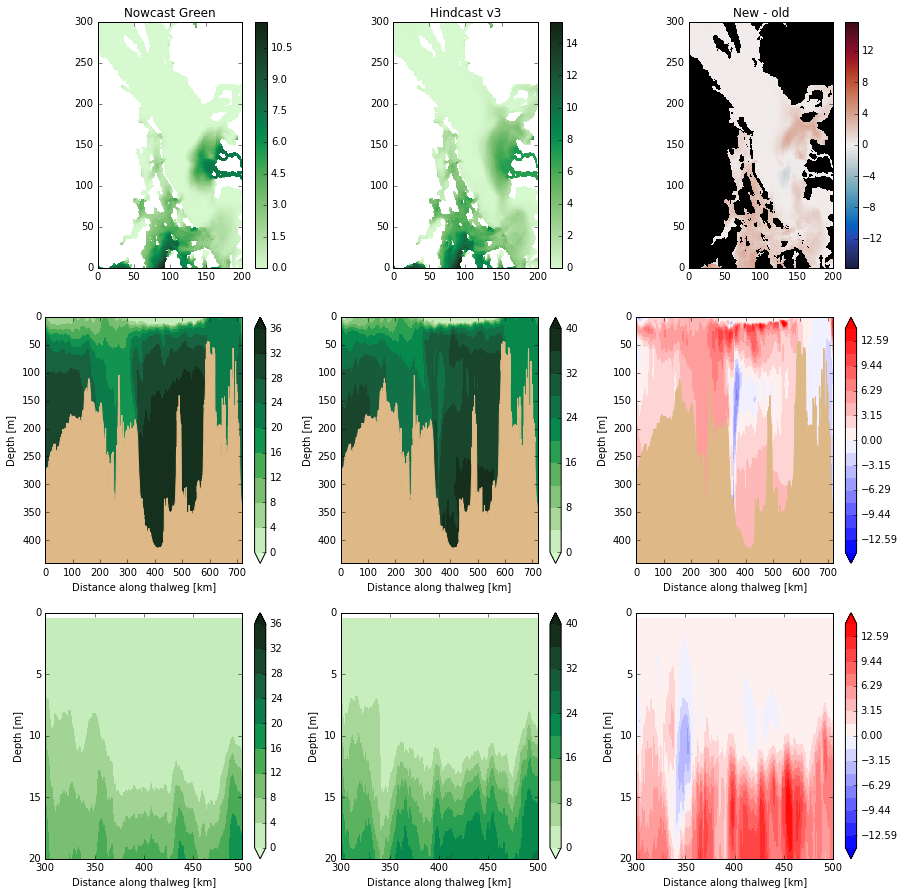

In [27]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, previous='Nowcast Green')

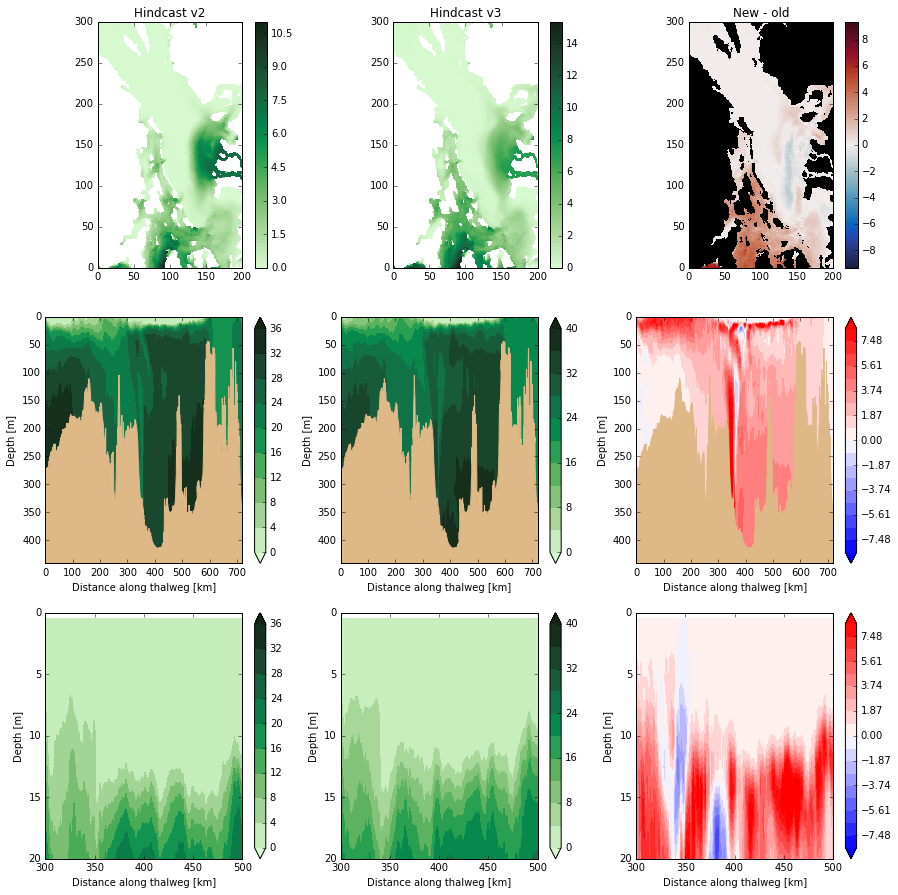

In [28]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmap, previous='Hindcast v2')

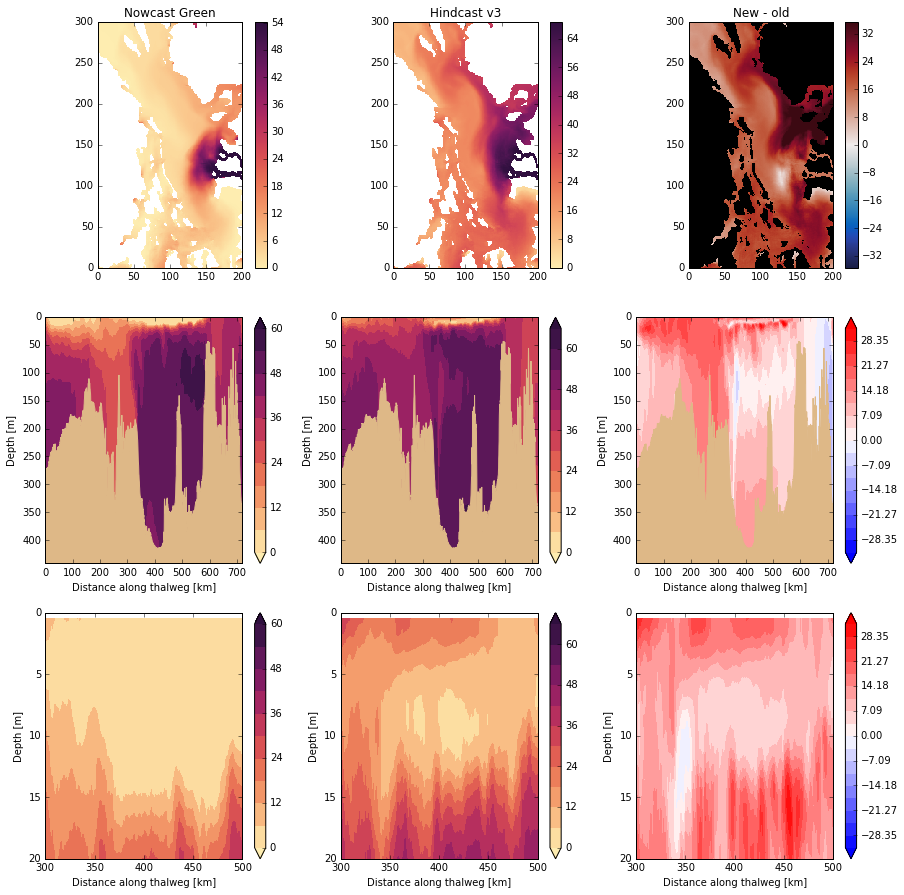

In [29]:
variable, name, cmap = 'silicon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, previous='Nowcast Green')

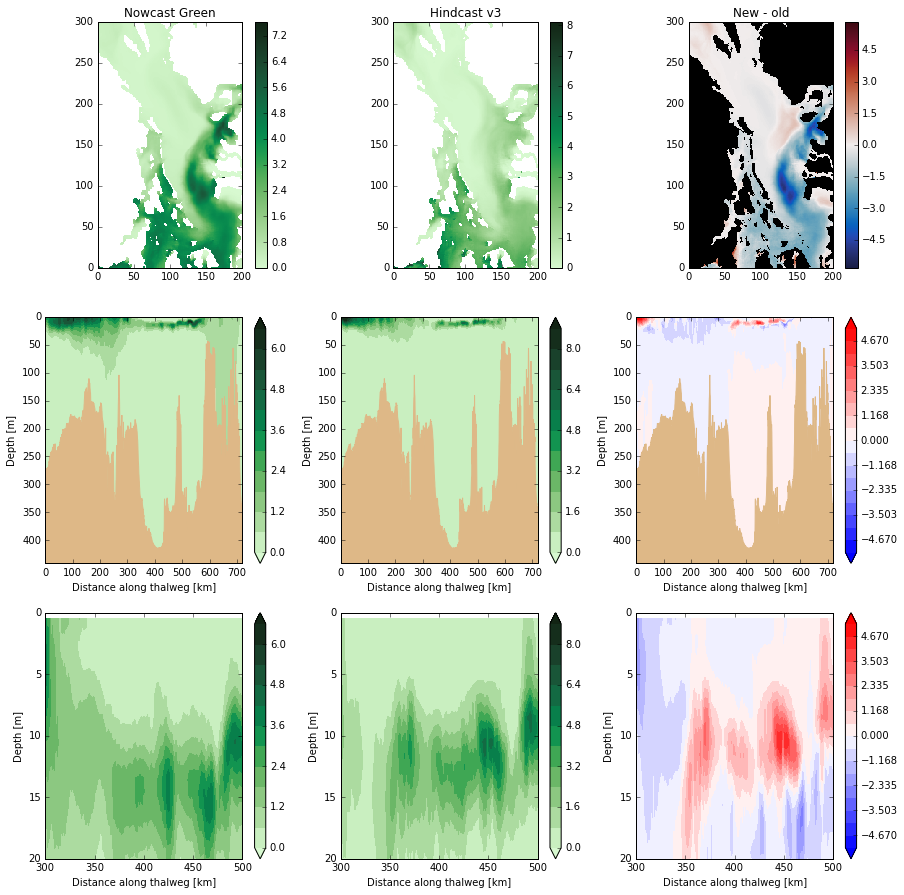

In [30]:
variable, name, cmap = 'diatoms', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, previous='Nowcast Green')

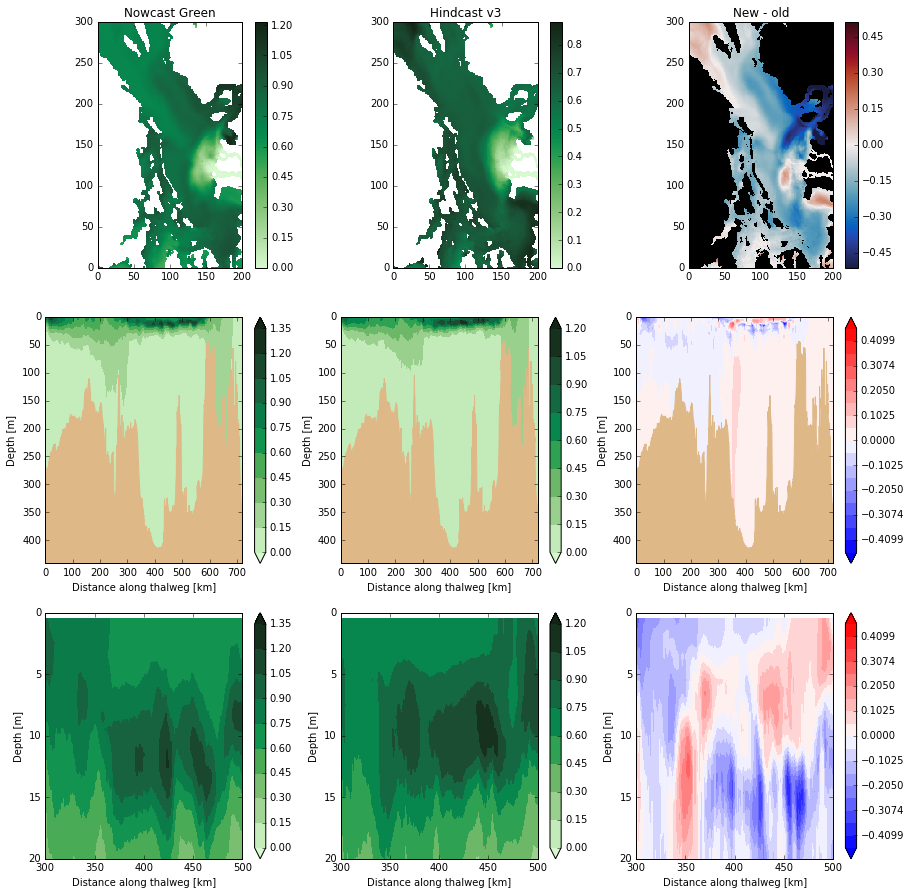

In [31]:
variable, name, cmap = 'flagellates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, previous='Nowcast Green')

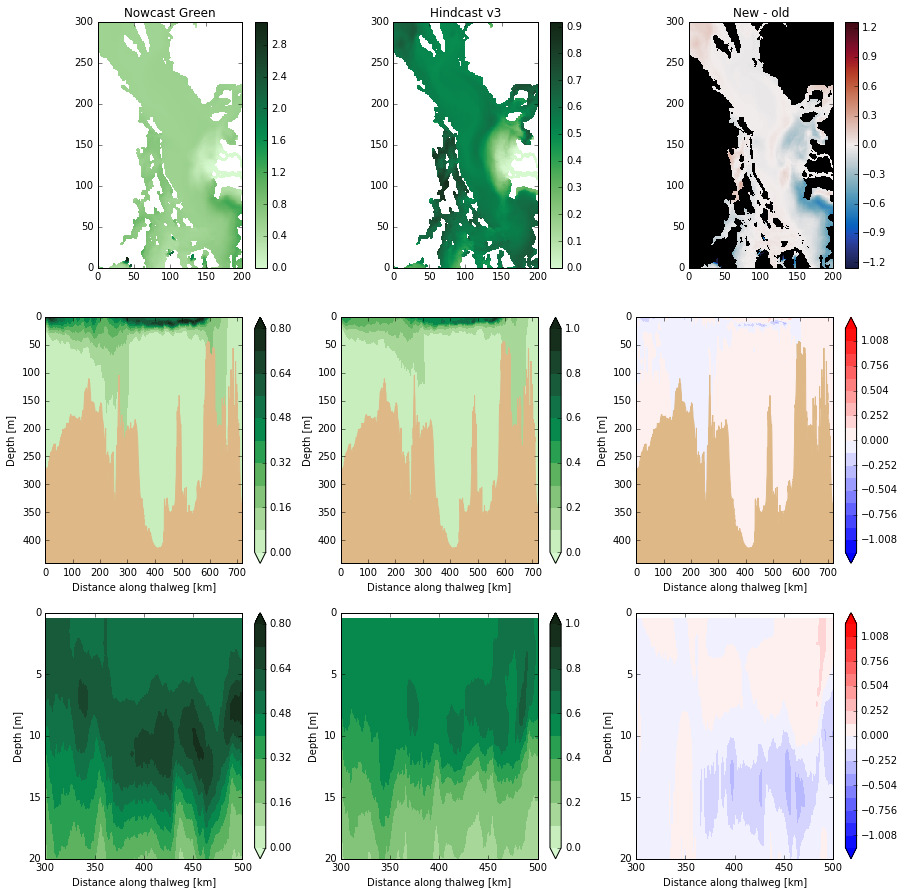

In [32]:
variable, name, cmap = 'ciliates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, previous='Nowcast Green')

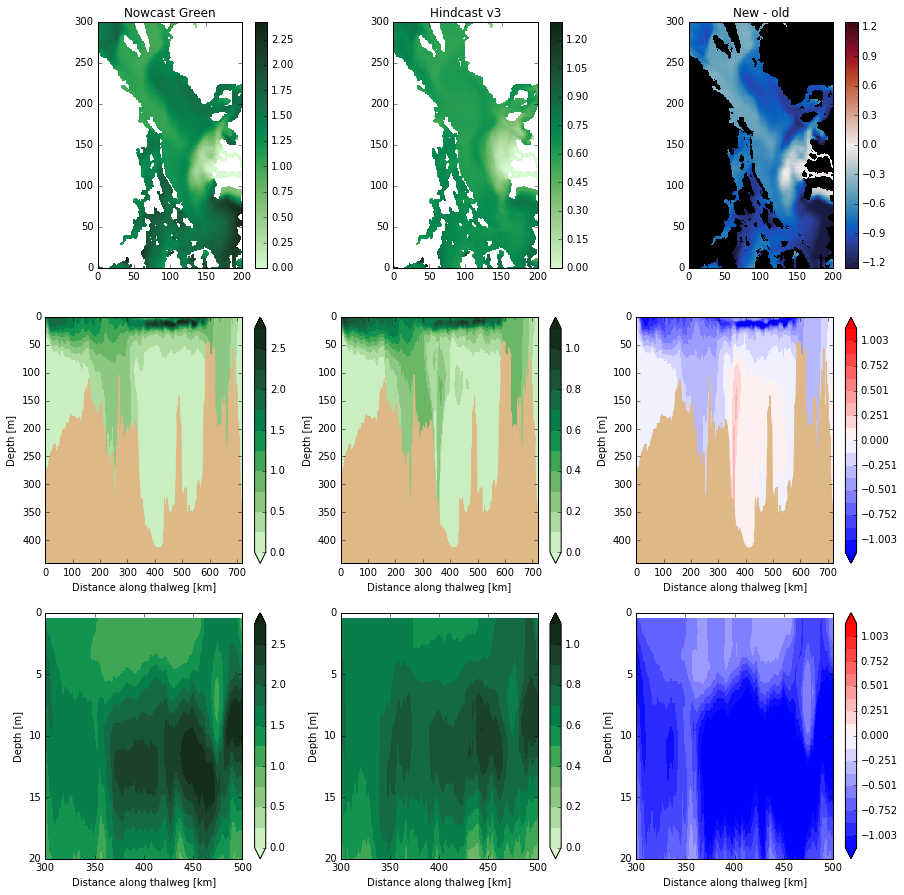

In [33]:
variable, name, cmap = 'microzooplankton', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, previous='Nowcast Green')

In [42]:
hd = xr.open_dataset('/results/SalishSea/hindcast/31may15/SalishSea_1d_20150531_20150531_carp_T.nc')
h2 = xr.open_dataset('/mnt/archive5/hindcast_201806_v2/31may15/SalishSea_1d_20150531_20150531_carp_T.nc')


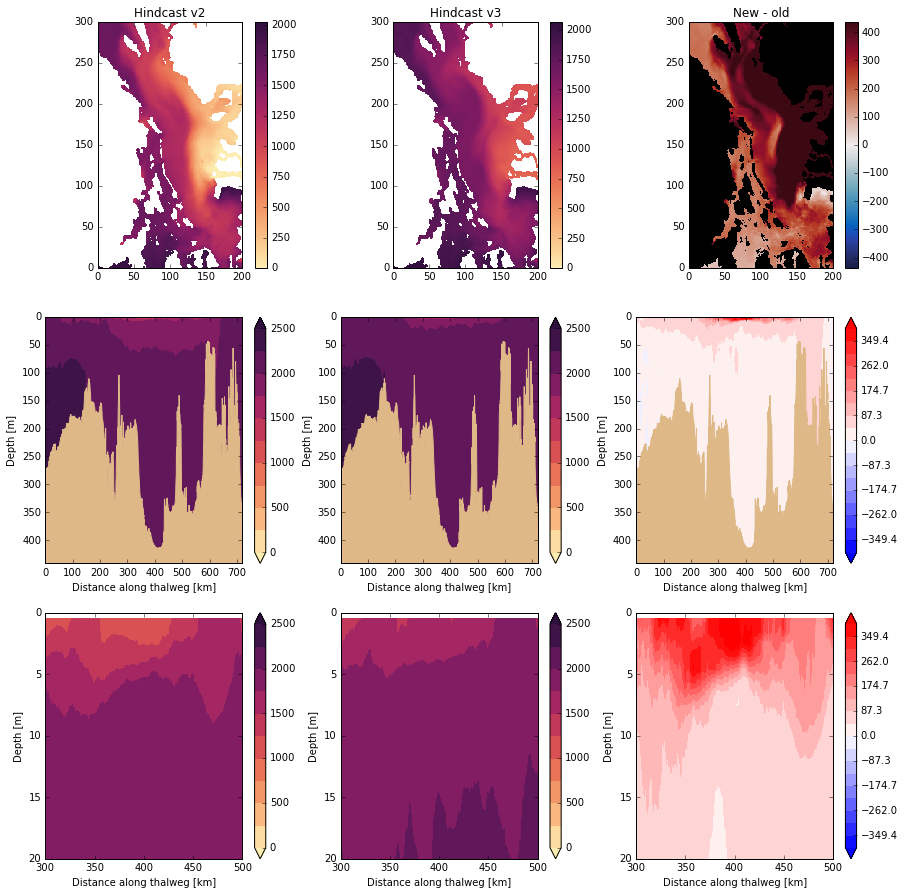

In [38]:
variable, name, cmap = 'dissolved_inorganic_carbon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmap, previous='Hindcast v2')

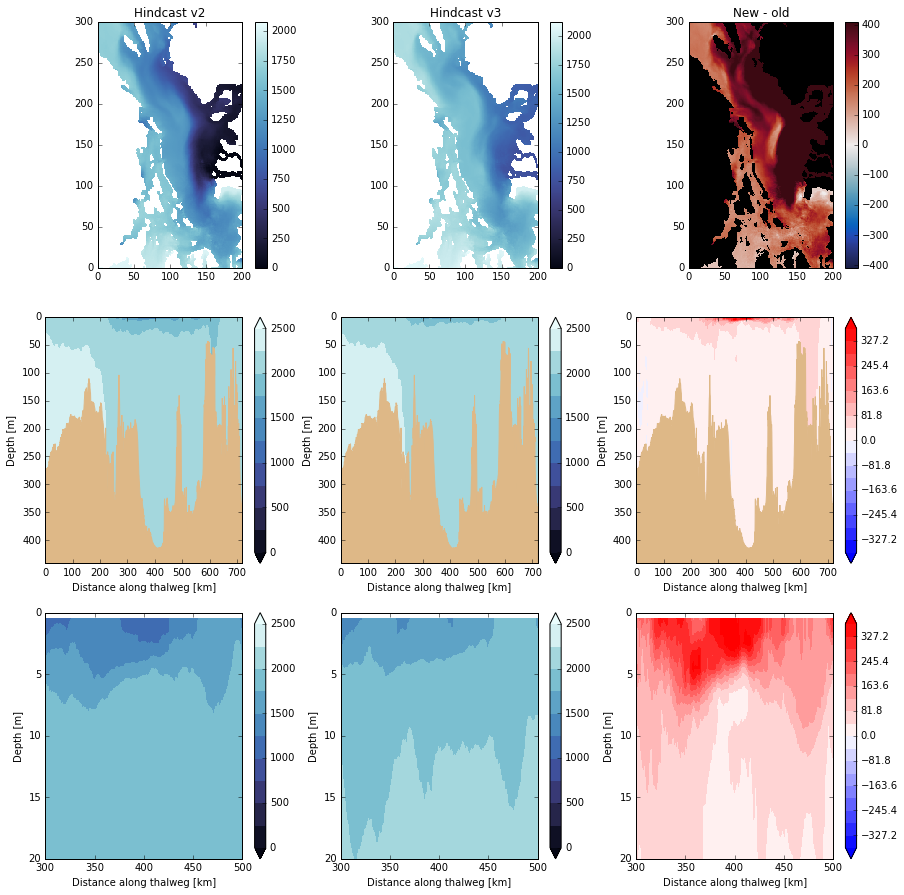

In [39]:
variable, name, cmap = 'total_alkalinity', 10, cm.ice
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmap, previous='Hindcast v2')

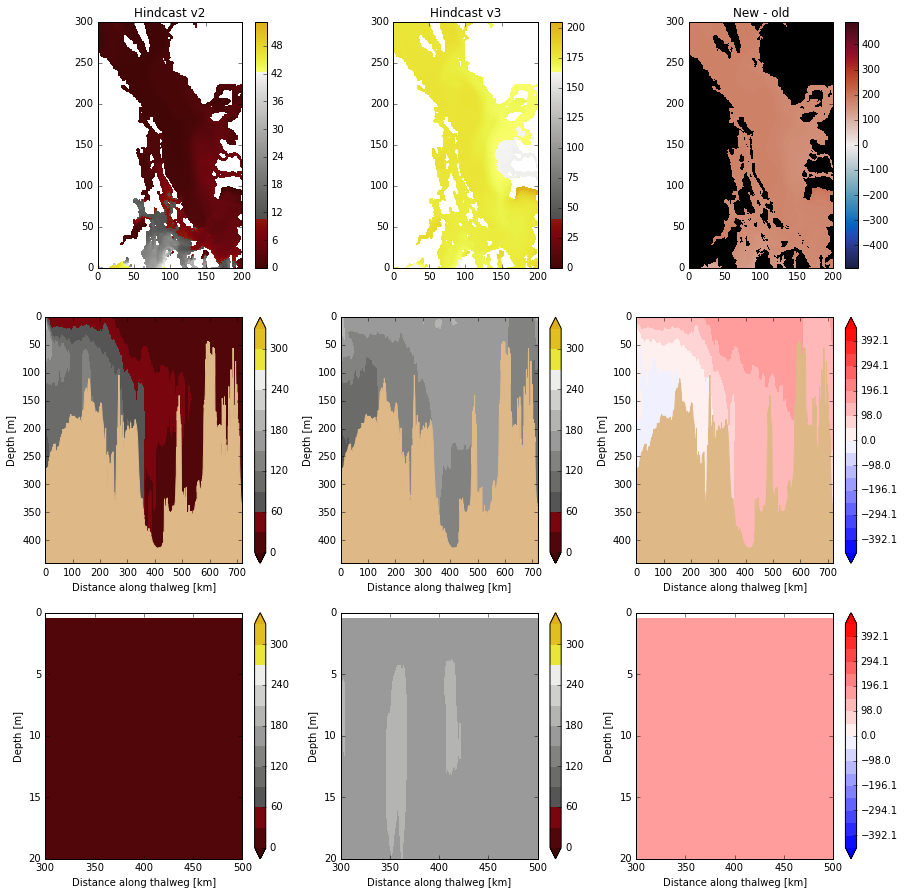

In [41]:
variable, name, cmap = 'dissolved_oxygen', 10, cm.oxy
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmap, previous='Hindcast v2', factor=2)

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


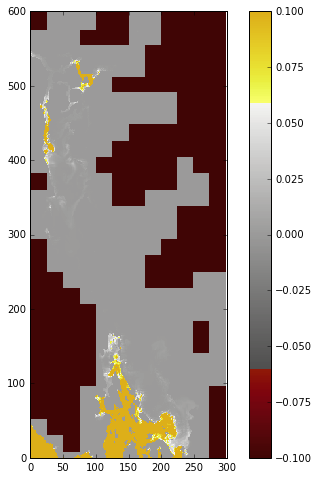

In [52]:
hd = xr.open_dataset('/results/SalishSea/hindcast/31may15/SalishSea_1h_20150531_20150531_mtrc_T.nc')
iz = 0
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
hind = np.array(hd.variables['tracer20m'][0])
colors = ax.pcolormesh(hind[iz], cmap=cm.oxy)
fig.colorbar(colors, ax=ax)
viz_tools.set_aspect(ax);